# Machine Learning Summary

Table of Contents
1. [Regression Example with single feature](#reg_lin)  
2. [Regression Example with Polynomial Feature](#reg_poly)  
3. [Trade-off Bias vs Variance](#tradeoff_bias_var)  
4. [Regularization](#regularization)  
5. [Logistic Regression](#logit)  
6. [](#pt6)  

In [2]:
from IPython.core.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
np.random.seed(42)
WHITE = '\033[39m'
CYAN = '\033[36m'

# <span id='pt1' style='font-size:0.8em;color:#1696d2'> 1. Modeling Workflow

- Exploratory Data Analysis  
- Define **hypothesis** and select the **estimator** to be used  ([Cheat-sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html))
- Split data into **train/test**, if necessary use **cross validation** too 
- Transform data, if necessary  
- Normalize data, if necessary  
- Create a instance of the estimator class with the desired **hyperparameters**  
- Train model using **train dataset**  
- Use the model to predict values in the **test/validation dataset**  
- Evaluate moel performance with **metrics** from the predictions  
- Restart cicle if necessary  
- **Deploy** model  

**Underfitting**:  
**Overfitting**:  
**Precision**:  
**Recall**:  

### <span id='reg_lin' style='color:#1696d2'> Linear Regression with Single Feature  

Train metrics:
r2_score: 0.84
mean_absolute_error: 27.25
mean_squared_error: 1145.94
Test metrics:
r2_score: 0.84
mean_absolute_error: 29.48
mean_squared_error: 1340.37


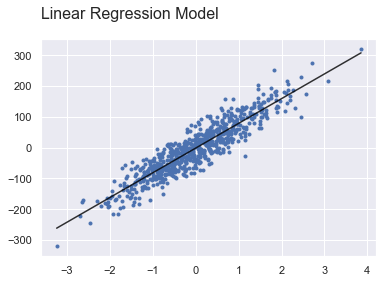

In [3]:
# Workflow after EDA is complete

# define features and target
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=700, n_features=1, noise=35, tail_strength=50, random_state=42)

# define hypothesis: target = countinuos value -> linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# fit model with train data
lin_reg.fit(X_train, y_train)

# make predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# evaluate metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def display_metrics(metric, y, y_pred):
    print(f'{CYAN}{metric.__name__}{WHITE}: {metric(y, y_pred):.2f}')

print('Train metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_train, y_pred_train)
print('Test metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_test, y_pred_test)

# visualize model
x_axis = np.linspace(X.min(), X.max(), 1000)
y_axis = lin_reg.intercept_ + lin_reg.coef_[0]*x_axis # f(x) = b0 + b1*x
plt.plot(x_axis, y_axis, color='black', alpha=0.8)
plt.scatter(X,y, marker='.')
plt.title('Linear Regression Model', size=16, loc='left', pad=20)
plt.show()


### <span id='reg_poly' style='color:#1696d2'>Linear Regression with Polynomial Feature

Original features = 1, After transform = 2
Train metrics:
r2_score: 0.73
mean_absolute_error: 3581.93
mean_squared_error: 31768871.34
Test metrics:
r2_score: 0.73
mean_absolute_error: 4331.75
mean_squared_error: 45871961.47


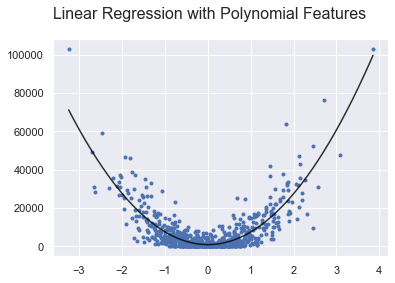

In [4]:
# define features and target
X, y = make_regression(n_samples=700, n_features=1, noise=35, tail_strength=50, random_state=42)
y = y**2

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# transform feature(s)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train) # fit only train to avoid data leak
X_train = poly.transform(X_train)
X_test = poly.transform(X_test)
print(f'Original features = {poly.n_features_in_}, After transform = {poly.n_output_features_}')

# fit model with train data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# make predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# evaluate metrics
print('Train metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_train, y_pred_train)
print('Test metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_test, y_pred_test)

# visualize model
x_axis = np.linspace(X.min(), X.max(), 1000)
y_axis = lin_reg.intercept_ + lin_reg.coef_[0]*(x_axis) + lin_reg.coef_[1]*(x_axis**2) # f(x) = b0 + b1*x + b2*x2

plt.plot(x_axis, y_axis, color='black', alpha=0.8)
plt.scatter(X,y, marker='.')
plt.title('Linear Regression with Polynomial Features', size=16, loc='left', pad=20)
plt.show()

### <span id='tradeoff_bias_var' style='color:#1696d2'>Trade-off Bias vs Variance

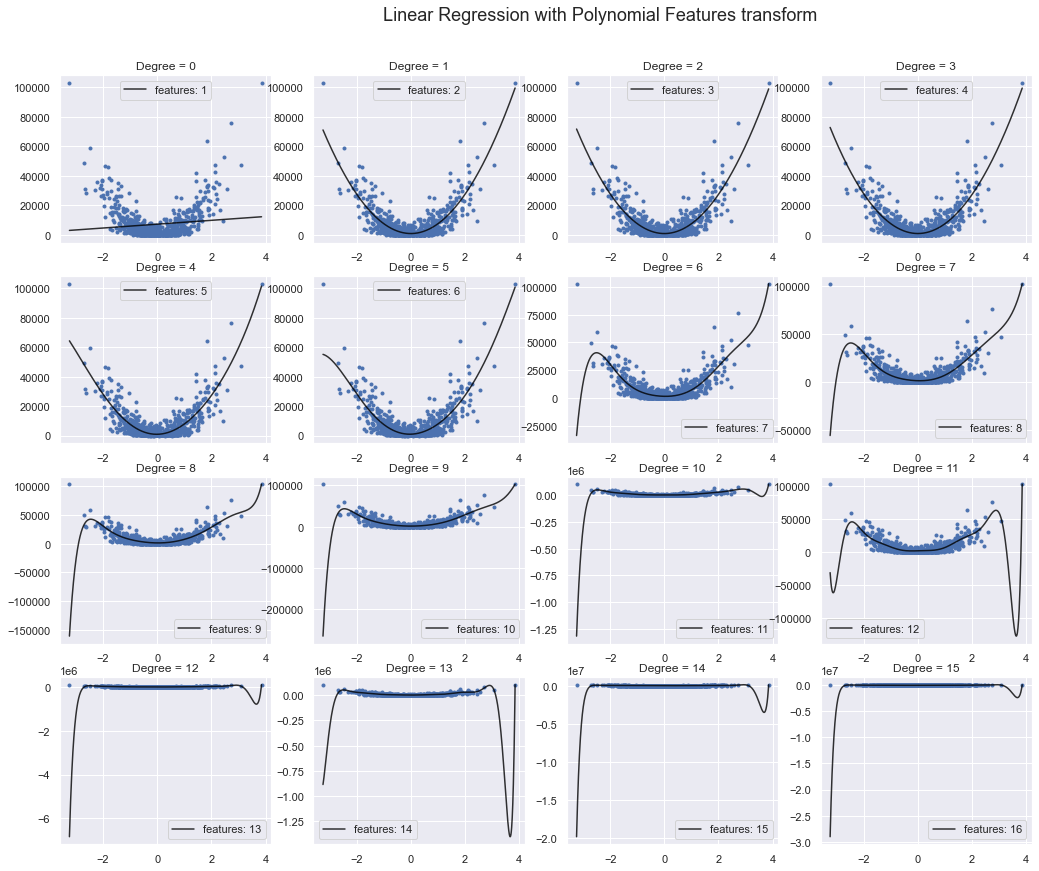

In [5]:
# empty df for store metrics data
results_df = pd.DataFrame({
    'Features':[],
    'MAE_train':[],
    'MAE_test':[],
    'R2_train':[],
    'R2_test':[]
})
# create data
X, y = make_regression(n_samples=700, n_features=1, noise=35, tail_strength=50, random_state=42)
y = y**2
# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# plot config
nrow, ncol = 4, 4
fig, ax = plt.subplots(nrow,ncol, figsize=(20,12))
# create model
for dg in range(nrow*ncol):
    # instance/fit poly
    poly = PolynomialFeatures(degree=dg+1, include_bias=False).fit(X_train)
    # transform features
    X_train_poly, X_test_poly = poly.transform(X_train), poly.transform(X_test)
    # fit model
    reg_lin = LinearRegression().fit(X_train_poly, y_train)
    # make prediction
    y_pred_train, y_pred_test = reg_lin.predict(X_train_poly), reg_lin.predict(X_test_poly)
    # visualize model
    x_axis = np.linspace(X.min(), X.max(), 1000)
    y_axis = reg_lin.intercept_ + sum([b_n*(x_axis**(n+1)) for n, b_n in enumerate(reg_lin.coef_)])
    ax[dg//nrow, dg%ncol].scatter(X,y, marker='.')
    ax[dg//nrow, dg%ncol].plot(x_axis, y_axis, color='black', alpha=0.8, label=f'features: {poly.n_output_features_}')
    ax[dg//nrow, dg%ncol].set_title(f'Degree = {dg}')
    ax[dg//nrow, dg%ncol].legend()
    #add metrics
    results_df = pd.concat([results_df,
                            pd.DataFrame({
                                'Features' : poly.n_output_features_,
                                'MAE_train' : mean_absolute_error(y_train, y_pred_train),
                                'MAE_test' : mean_absolute_error(y_test, y_pred_test),
                                'R2_train':r2_score(y_train, y_pred_train),
                                'R2_test':r2_score(y_test, y_pred_test)
                                }, index=[dg])
                            ])
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9)
fig.suptitle('Linear Regression with Polynomial Features transform',size=18);

In [6]:
results_df

,Features,MAE_train,MAE_test,R2_train,R2_test
0,1.0,7181.560933,8121.313244,0.013668,-0.054221
1,2.0,3581.933778,4331.752527,0.731494,0.730499
2,3.0,3581.400263,4325.382292,0.731511,0.732158
3,4.0,3581.195690,4321.621979,0.731529,0.734497
4,5.0,3579.894828,4340.232799,0.731904,0.715263
5,6.0,3581.464832,4408.618829,0.732056,0.682749
6,7.0,3544.409828,5078.571268,0.737072,-0.005538
7,8.0,3543.895806,5241.180968,0.737163,-0.279381
8,9.0,3538.829341,6027.308969,0.737724,-2.133741
9,10.0,3541.570521,6785.407158,0.737877,-4.935238


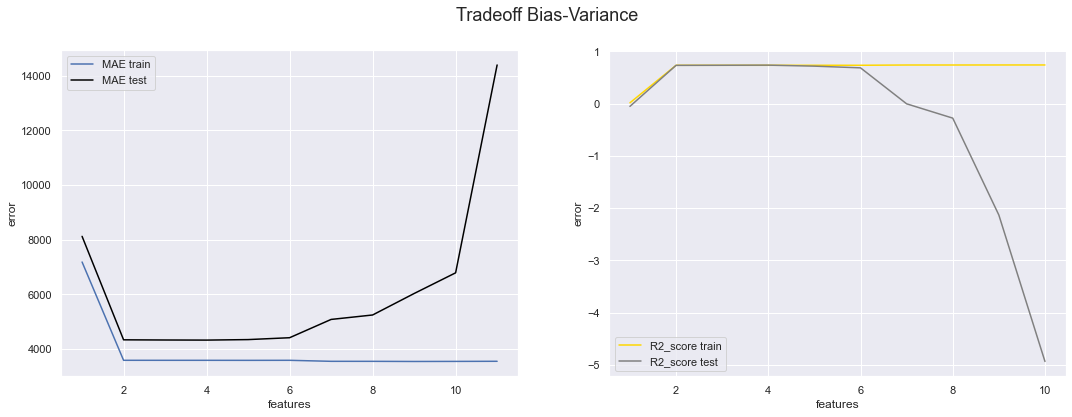

In [7]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(results_df[:11]['Features'], results_df[:11]['MAE_train'], label='MAE train')
ax[0].plot(results_df[:11]['Features'], results_df[:11]['MAE_test'], label='MAE test', color='black')
ax[1].plot(results_df[:10]['Features'], results_df[:10]['R2_train'], label='R2_score train', color='gold')
ax[1].plot(results_df[:10]['Features'], results_df[:10]['R2_test'], label='R2_score test', color='gray')
ax[0].set_xlabel('features'), ax[1].set_xlabel('features')
ax[0].set_ylabel('error'), ax[1].set_ylabel('error')
ax[0].legend(), ax[1].legend()
fig.suptitle('Tradeoff Bias-Variance', size=18);

### <span id='regularization' style='color:#1696d2'>Regularization

**Objective**: reduce the complexity of the model in order to avoid learning noises from the training dataset(overfitting).  
This is done by restricting the hypothesis space.  

- $\lambda$: force of the regularization  
- **L1 (Lasso)**: feature selection by setting the coefficient to zero  
- **L2 (Ridge)**: coefficient value tends to zero, don't apply feature selection  
- **Elastic Net**: uses both L1 and L2  
  
*Features must be scaled before applying regularization!*

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge

In [9]:
def calc_y_plot(estimator, x_plot):

    y_plot = estimator.intercept_

    for n, b_n in enumerate(estimator.coef_):

        y_plot = y_plot + b_n*(x_plot**(n+1))
    
    return y_plot

#### Overfitting Example

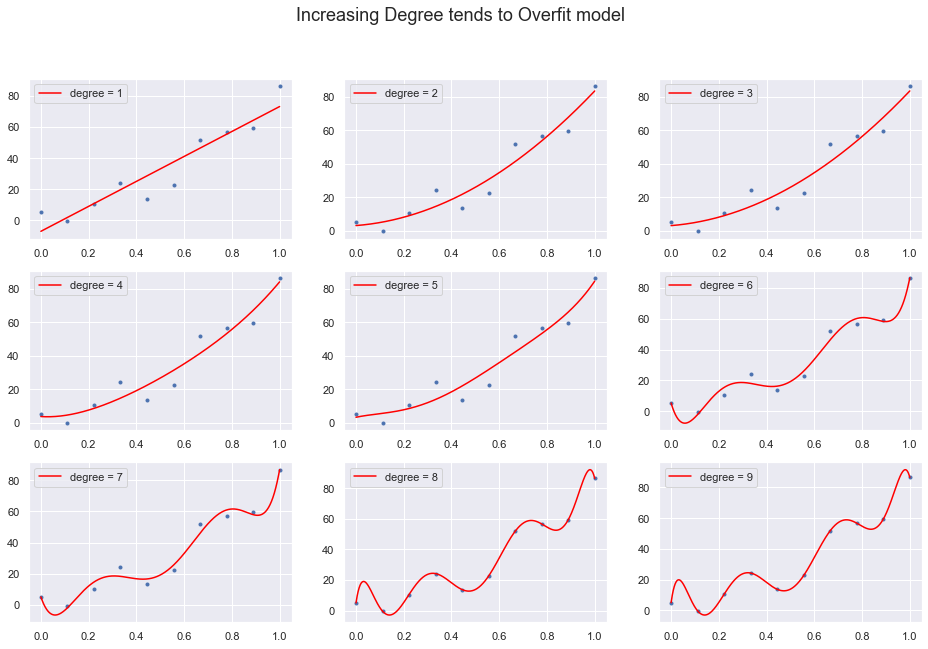

In [10]:
# create data
X = np.arange(10)
y = X**2
# add noises to feature
np.random.seed(42)
noise = np.random.normal(0,10,10)
y = y + noise

# configure plot
nrow, ncol = 3, 3
fig, ax = plt.subplots(nrow, ncol, figsize=(16,10))
plt.suptitle('Increasing Degree tends to Overfit model', size=18)
for degree in range(9):
    # poly transform
    poly = PolynomialFeatures(degree = degree+1, include_bias = False).fit(X.reshape(-1,1))
    X_poly = poly.transform(X.reshape(-1,1))
    # scaled data
    mms = MinMaxScaler().fit(X_poly)
    X_transf = mms.transform(X_poly)
    # fit model + regularization
    reg_lin = LinearRegression().fit(X_transf, y)
    #reg_l1 = Lasso(alpha=1).fit(X_transf, y)
    #reg_l2 = Ridge(alpha=1).fit(X_transf, y)
    x_plot = np.linspace(X_transf[:,0].min(), X_transf[:,0].max(),1000) # teoric function
    y_plot = calc_y_plot(reg_lin, x_plot) # model function
    # add subplot
    ax[degree//nrow, degree%ncol].scatter(X_transf[:,0], y, marker = '.')
    ax[degree//nrow, degree%ncol].plot(x_plot, y_plot, color = 'red', label = f'degree = {degree+1}')
    ax[degree//nrow, degree%ncol].legend()

#### Adding Regularization

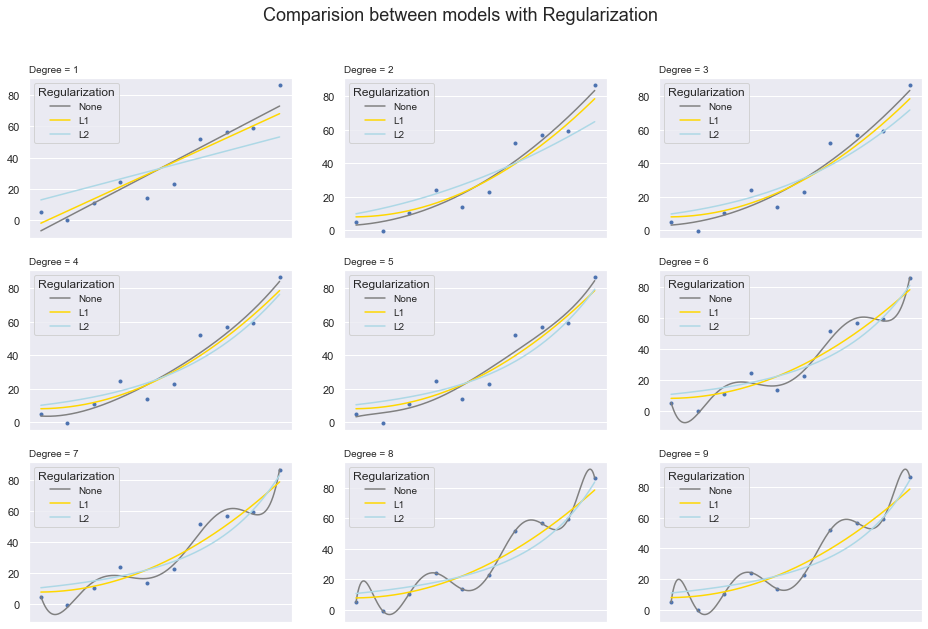

In [11]:
# create data
X = np.arange(10)
y = X**2
# add noises to feature
np.random.seed(42)
noise = np.random.normal(0,10,10)
y = y + noise

# configure plot
nrow, ncol = 3, 3
fig, ax = plt.subplots(nrow, ncol, figsize=(16,10))
plt.suptitle('Comparision between models with Regularization', size=18)
for degree in range(9):
    # poly transform
    poly = PolynomialFeatures(degree = degree+1, include_bias = False).fit(X.reshape(-1,1))
    X_poly = poly.transform(X.reshape(-1,1))
    # scaled data
    mms = MinMaxScaler().fit(X_poly)
    X_transf = mms.transform(X_poly)
    # fit model + regularization
    reg_lin = LinearRegression().fit(X_transf, y)
    reg_l1 = Lasso(alpha=1).fit(X_transf, y)
    reg_l2 = Ridge(alpha=1).fit(X_transf, y)
    # plot base
    x_plot = np.linspace(X_transf[:,0].min(), X_transf[:,0].max(),1000) # teoric function
    ax[degree//nrow, degree%ncol].scatter(X_transf[:,0], y, marker = '.')
    ax[degree//nrow, degree%ncol].set_title(f'Degree = {degree+1}', loc= 'left', fontsize=10)
    ax[degree//nrow, degree%ncol].set_xticks([])
    # for linear regression
    y_plot = calc_y_plot(reg_lin, x_plot)
    ax[degree//nrow, degree%ncol].plot(x_plot, y_plot, color = 'grey', label = f'None')
    # for l1(lasso) regularization
    y_plot = calc_y_plot(reg_l1, x_plot)
    ax[degree//nrow, degree%ncol].plot(x_plot, y_plot, color = 'gold', label = f'L1')
    # for l2(ridge) regularization
    y_plot = calc_y_plot(reg_l2, x_plot)
    ax[degree//nrow, degree%ncol].plot(x_plot, y_plot, color = 'lightblue', label = f'L2')
    # add legend
    ax[degree//nrow, degree%ncol].legend(title='Regularization', fontsize='small')

### <span id='logit' style='color:#1696d2'>Logistic Regression

Used in **classification** problems, target variable is discrete.

<span style='font-size:2em'>$\mathcal{H} = \left \{ \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}} \right \}$.</span>

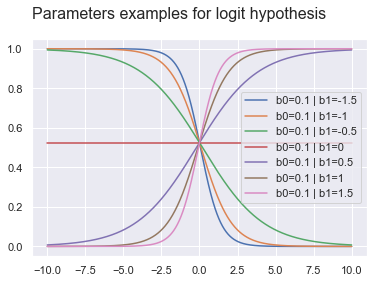

In [12]:
sigmoid = lambda x : 1 / (1 + np.exp(-x))
linear_hip = lambda x, b0 , b1: b0 + b1 * x
x = np.linspace(-10, 10, 1000)
b0 = 0.1
b1_list = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]

for b1 in b1_list:
    y = sigmoid(linear_hip(x, b0, b1))
    plt.plot(x, y, label=f'b0={b0} | b1={b1}')
    plt.legend()
plt.title('Parameters examples for logit hypothesis', size=16, pad=20, loc= 'left')
plt.show()

#### Classification Example

In [13]:
# create data
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=5, random_state=42)

Example of feature distribuition


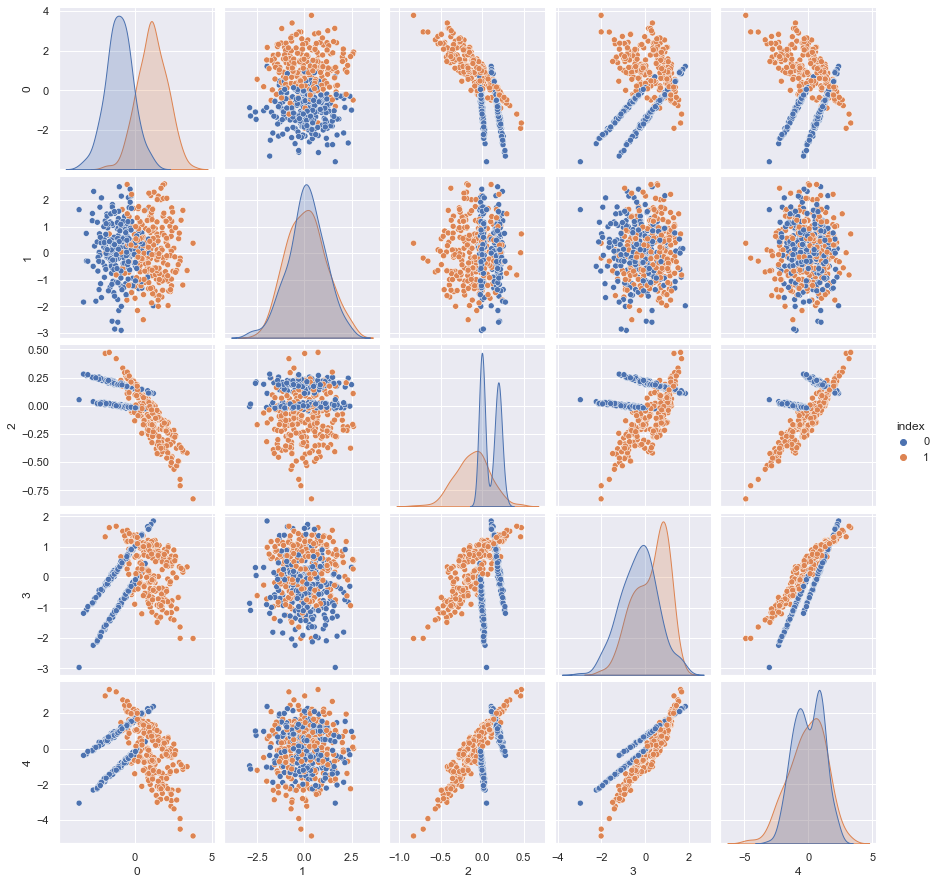

In [14]:
sns.pairplot(data=pd.DataFrame(X,y).reset_index(), hue='index')
print('Example of feature distribuition')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
# fit model
logit = LogisticRegression().fit(X_train, y_train)

# predition with cutoff 50%
y_pred = logit.predict(X_test)
# classification probability
y_proba = logit.predict_proba(X_test)
print(f'Model accuracy: {sum(y_pred == y_test) / y_pred.shape[0] * 100} %')

Model accuracy: 89.0 %


#### Classification Metrics

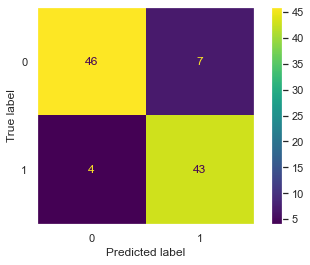

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
plt.grid(False);

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
#pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.86      0.91      0.89        47

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, pos_label=1), recall_score(y_test, y_pred)

(0.86, 0.9148936170212766)

#### Precision/Recall Trade-off

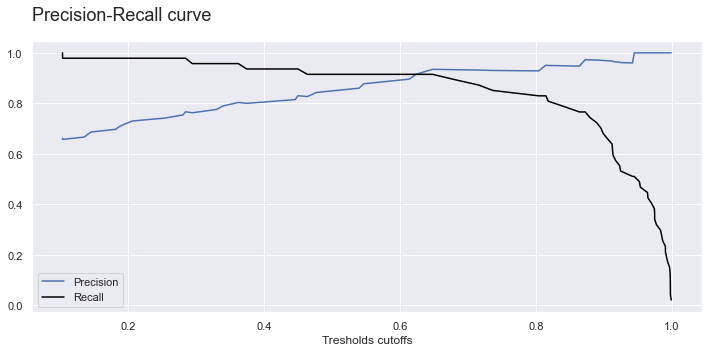

In [19]:
from sklearn.metrics import precision_recall_curve

y_scores = logit.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(12,5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall', color='black')

plt.title('Precision-Recall curve', fontsize=18, pad=20, loc='left')
plt.xlabel('Tresholds cutoffs')
plt.legend()
plt.show()

#### ROC Curve

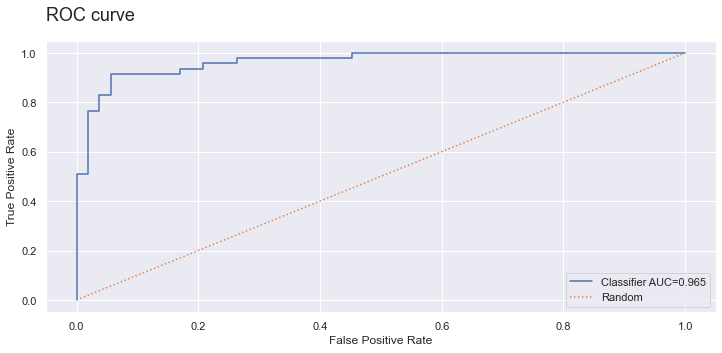

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tresholds = roc_curve(y_test, y_scores)

score = round(roc_auc_score(y_test, y_scores),3)

plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, label=f'Classifier AUC={score}')
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), ls=':', label='Random')

plt.title('ROC curve', fontsize=18, pad=20, loc='left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### <span id='cross_validation' style='color:#1696d2'>Cross Validation

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=400>

,X1,X2,X3,X4,X5,y
0,-0.109610,0.546284,-0.088363,0.006422,-0.436386,79.870807
1,-1.024388,-0.926930,-0.252568,-0.059525,-3.241267,-115.324859
2,-2.650970,0.106430,1.091507,-0.254977,1.503993,35.552509
3,-0.850520,-0.138456,-0.580523,-1.224298,-0.209023,-145.413703
4,-0.322680,-0.756795,-0.250833,-1.421811,1.501334,-116.148875
...,...,...,...,...,...,...
495,-1.363174,-1.598124,0.189706,0.462173,2.024310,-87.798391
496,0.239247,-1.979300,2.074083,0.747910,-1.072743,-92.452927
497,2.189803,-0.767348,-0.808298,0.872321,0.183342,20.274546
498,0.615367,0.513106,-0.935439,-0.259547,0.738810,43.199300


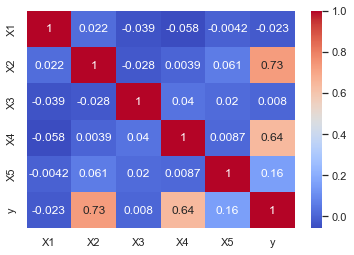

In [21]:
X, y = make_regression(n_samples=500,
                n_features=5,
                n_informative=3,
                noise=25,
                tail_strength=10,
                random_state=42)

features = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(5)])
target = pd.Series(y, name='y')
df = pd.concat([features, target], axis=1)
display(df)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import ElasticNet

In [23]:
def make_cv(X, y, estimator, n_splits, scoring):
    # create folds
    kf = KFold(n_splits = n_splits, random_state = 42, shuffle = True)
    # generate cross validation
    cv_results = cross_validate(estimator = estimator, 
                            X = X, y = y, 
                            cv = kf, 
                            scoring = scoring,
                            return_train_score = True
                        )
    # store results
    cv_results_df = pd.DataFrame(cv_results).abs()
    display(cv_results_df[['train_score', 'test_score']].describe())
    # plot data
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
    sns.histplot(data=cv_results_df, x='train_score', kde=True, ax=ax1)
    ax1.set_title('Train distribuition')
    sns.histplot(data=cv_results_df, x='test_score', kde=True, ax=ax2)
    ax2.set_title('Test distribuition')
    

,train_score,test_score
count,5.000000,5.000000
mean,34.933945,35.111237
std,0.483539,1.805506
min,34.382697,33.573468
25%,34.538921,33.870163
50%,34.920248,33.954736
75%,35.329187,36.915451
max,35.498673,37.242368


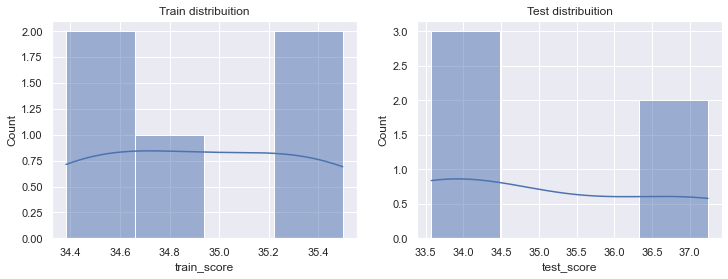

In [24]:
make_cv(X, y, ElasticNet(), 5, 'neg_mean_absolute_error')

,train_score,test_score
count,300.000000,300.000000
mean,34.912263,35.023186
std,0.040493,20.436628
min,34.762998,1.406865
25%,34.889036,20.084035
50%,34.915924,30.976906
75%,34.937626,48.803868
max,35.073417,99.564988


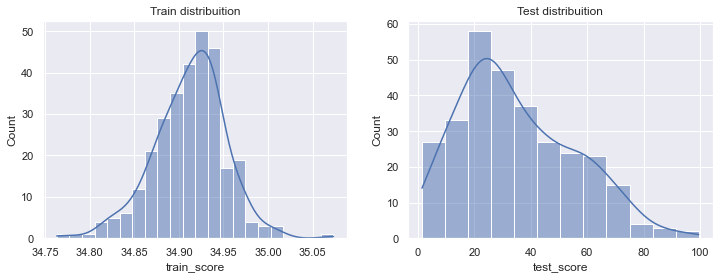

In [25]:
make_cv(X, y, ElasticNet(), 300, 'neg_mean_absolute_error')

### <span id='knn' style='color:#1696d2'>KNN

**k nearest neighbors** steps:  

1. Receive a non-classified data  
2. Measure distance (Euclidiana, Manhattan, Minkowski ou Weighted) for each element in the training dataset  
3. Get a ranking from the distances, in ascending order  
4. Verifies the class of each *K* data with the lower distance and count them  
5. Classifies data according to predominant class  

**Caution when selecting *k* size**
- `k = 1` leads to overfitting, model will learn any particularity or noise  
- `k = n` leads to underffint, model will always ajust to the predominant class  
  
Other observations:  
- Data must be scaled, since the algorithm is measuring distances;  
- Check if the classes are even distributed;  
- Uses `stratify` parameter when splitting data into train/test to evenly distribute the target.  

More info:  
- [Guie to Imbalanced Classification](#https://machinelearningmastery.com/what-is-imbalanced-classification/)  
- [Correcting Imbalanced Data](#https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)

#### Example with Breast Cancer Dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


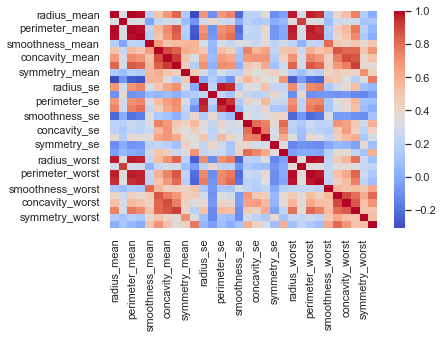

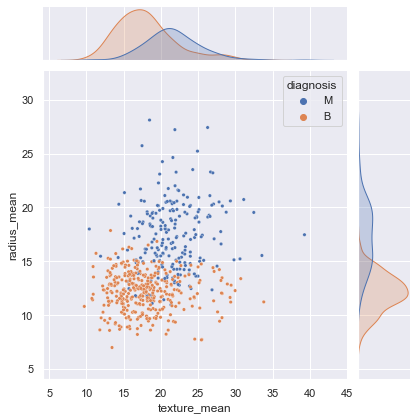

In [26]:
df = pd.read_csv('../datasets/breast_cancer.csv').drop('id', axis=1)
display(df.head())
sns.heatmap(df.corr(), cmap='coolwarm')
sns.jointplot(data=df, x='texture_mean', y='radius_mean', hue='diagnosis', s=12);

In [27]:
# check classification balance
df['diagnosis'].value_counts(True) * 100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

The data is slightly unbalanced, it's ok to proceed since its a natural imbalance.  

#### First Cicle: Baseline

In [28]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
# train/test with stratify parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

# normalize data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
# fit to model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
# predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [29]:
def make_classification_report(y_train, y_pred_train, y_test, y_pred_test):
    train_report = pd.DataFrame(classification_report(y_train, y_pred_train, output_dict=True))
    train_report.index = pd.MultiIndex.from_product([["Train Dataset"], train_report.index])
    test_report = pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True))
    test_report.index = pd.MultiIndex.from_product([["Test Dataset"], test_report.index])
    return pd.concat([train_report,test_report])

B           M  accuracy   macro avg  \
Train Dataset precision    0.969283    0.993827  0.978022    0.981555   
              recall       0.996491    0.947059  0.978022    0.971775   
              f1-score     0.982699    0.969880  0.978022    0.976289   
              support    285.000000  170.000000  0.978022  455.000000   
Test Dataset  precision    0.946667    0.974359  0.956140    0.960513   
              recall       0.986111    0.904762  0.956140    0.945437   
              f1-score     0.965986    0.938272  0.956140    0.952129   
              support     72.000000   42.000000  0.956140  114.000000   

                         weighted avg  
Train Dataset precision      0.978454  
              recall         0.978022  
              f1-score       0.977909  
              support      455.000000  
Test Dataset  precision      0.956869  
              recall         0.956140  
              f1-score       0.955776  
              support      114.000000

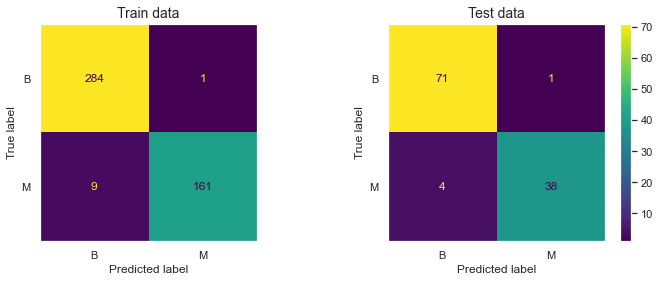

In [30]:
report = make_classification_report(y_train, y_pred_train, y_test, y_pred_test)
display(report)

fig, axes = plt.subplots(1,2, figsize=(12,4))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=axes[0], colorbar=False)
axes[0].set_title('Train data', fontsize=14)
axes[0].grid(False)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=axes[1])
axes[1].set_title('Test data',fontsize=14)
axes[1].grid(False)

#### Second Cicle: Applying Cross Validation

In [31]:
# alternate method(without make_scorer): map classifiers y_mapped = y.map({'B':0,'M':1}); train_test_split(X, y_mapped);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# normalize
ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
# fit to model
knn = KNeighborsClassifier().fit(X_train, y_train)
# k folds
group = KFold(n_splits=10, shuffle=True, random_state=42)
# select metric, adding label
from sklearn.metrics import make_scorer, f1_score
metric = make_scorer(f1_score, pos_label='M')
# make cv
results =  cross_validate(estimator=knn, X=X_train, y=y_train,
                            cv=group, scoring=metric, return_train_score=True)
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,0.001706,0.006343,0.947368,0.971246
1,0.001506,0.013253,0.977778,0.972222
2,0.001265,0.008148,0.974359,0.969283
3,0.001729,0.010353,0.971429,0.962712
4,0.001142,0.007944,0.952381,0.971061
5,0.001422,0.008645,0.974359,0.962199
6,0.001949,0.006200,0.947368,0.969283
7,0.001853,0.007063,0.937500,0.962963
8,0.002012,0.008288,0.818182,0.974026
9,0.001863,0.006301,0.972973,0.962457


### <span id='pipeline' style='color:#1696d2'>Pipeline  

In [32]:
from sklearn.pipeline import Pipeline

# read data
df = pd.read_csv('../datasets/breast_cancer.csv')
# define features/target
X = df.drop(['id','diagnosis'], axis=1)
y = df['diagnosis']
# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# CREATE PIPELINE
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]).fit(X_train, y_train)

# define groups
from sklearn.model_selection import StratifiedKFold
group = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# define metrics
metric = make_scorer(f1_score, pos_label='M')
# generate results - add pipeline
results =  cross_validate(estimator=pipeline, X=X_test, y=y_test,
                            cv=group, scoring=metric, return_train_score=True)
pd.DataFrame(results)

,fit_time,score_time,test_score,train_score
0,0.009067,0.006250,1.000000,0.960000
1,0.006968,0.007652,0.857143,0.960000
2,0.009558,0.005249,0.888889,0.972222
3,0.005439,0.008110,0.888889,0.958904
4,0.006270,0.004856,0.857143,0.986667
5,0.009395,0.006110,1.000000,0.960000
6,0.008074,0.005411,1.000000,0.960000
7,0.004667,0.007570,1.000000,0.945946
8,0.007622,0.008208,1.000000,0.972973
9,0.008611,0.007776,1.000000,0.960000


### <span id='gridsearch' style='color:#1696d2'>GridSearch

Synthax Example  

```python
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]).fit(X_train, y_train)

# key: '[object_id]_[object_parameter]'; value: list of possible values for the parameter
parameters = {  
        'knn__weights' : ['uniform','distance'],  
        'knn__metric' : ['manhattan','euclidean'],  
        'knn__n_neighbors' : range(2, 21)  
    }

GridSearchCV(
            estimator = pipeline, 
            param_grid = parameters, 
            scoring = metrics,      # string or make_scorer
            cv = splitter,          # kfold object
            verbose = 1             # display progress
            )
```

In [33]:
# read data
df = pd.read_csv('../datasets/breast_cancer.csv')
# define features/target
X = df.drop(['id','diagnosis'], axis=1)
y = df['diagnosis']
# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# create pipeline
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]).fit(X_train, y_train)
# define groups
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# define metrics
from sklearn.metrics import recall_score
metrics = make_scorer(recall_score, pos_label='M')

# define grid parameters
# synthax: '[object_id]__[hyperparameter_name]': [values]
from sklearn.model_selection import GridSearchCV
parameters = {
        'knn__weights' : ['uniform','distance'],
        'knn__metric' : ['manhattan','euclidean'],
        'knn__n_neighbors' : range(2, 21)
    }

grid_knn = GridSearchCV(estimator = pipeline, 
                    param_grid = parameters, 
                    scoring = metrics,
                    cv = splitter,
                    verbose = 1, 
                    #refit=[metric_name] or [bool] #used for multiple metrics
                    )
# fit all models
grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=1)

In [34]:
grid_knn.best_estimator_, grid_knn.best_params_, grid_knn.best_score_

(Pipeline(steps=[('std_scaler', StandardScaler()),
                 ('knn',
                  KNeighborsClassifier(metric='manhattan', n_neighbors=3))]),
 {'knn__metric': 'manhattan',
  'knn__n_neighbors': 3,
  'knn__weights': 'uniform'},
 0.9411764705882353)

In [35]:
grid_results_df = pd.DataFrame(grid_knn.cv_results_)
grid_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006826,0.003002,0.010815,0.005814,manhattan,2,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.882353,...,1.0,0.823529,0.823529,0.764706,1.0,0.941176,0.882353,0.900000,0.074639,51
1,0.007287,0.001740,0.005114,0.000876,manhattan,2,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.882353,...,1.0,1.000000,0.882353,0.823529,1.0,0.941176,0.882353,0.935294,0.061414,7
2,0.006497,0.001116,0.009260,0.001404,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.000000,0.941176,0.941176,0.074407,1
3,0.005985,0.001032,0.005322,0.000981,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.000000,0.941176,0.941176,0.074407,1
4,0.007856,0.003344,0.008815,0.002125,manhattan,4,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.882353,0.823529,0.764706,1.0,0.941176,0.941176,0.923529,0.079139,11


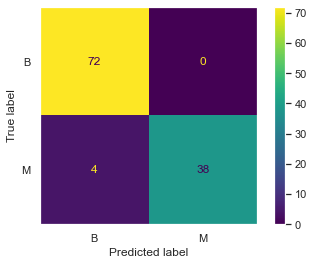

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [36]:
y_pred_test = grid_knn.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.grid(False)
plt.show()

print(classification_report(y_test, y_pred_test))

In [37]:
31.9*3

95.69999999999999

### <span id='gridsearch' style='color:#1696d2'>Decision Tree

# <span id='pt2' style='font-size:0.8em;color:#1696d2'> 2.  

# <span id='pt3' style='font-size:0.8em;color:#1696d2'> 3.  

# <span id='pt4' style='font-size:0.8em;color:#1696d2'> 4.  

# <span id='pt5' style='font-size:0.8em;color:#1696d2'> 5.  